# NFL Lines Machine Learning
#### source data for historical spreads and game scores: https://www.kaggle.com/datasets/tobycrabtree/nfl-scores-and-betting-data?resource=download

## setup

In [27]:
#First code: importing fundamental libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#import datasets
stadiums = pd.read_csv(r"\kaggle\2024 NFL/nfl_stadiums.csv",header=0,encoding='unicode_escape')
teams = pd.read_csv(r"\kaggle\2024 NFL/nfl_teams.csv",header=0)
games = pd.read_csv(r"\kaggle\2024 NFL/spreadspoke_scores.csv",header=0)

#Lets look at each of the datasets
stadiums.head(5)

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_zipcode,stadium_weather_type,stadium_capacity,stadium_surface,stadium_weather_station,stadium_weather_station_name,stadium_latitude,stadium_longitude,stadium_azimuthangle,stadium_elevation
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,"65,500",Grass,USW00094823,"PITTSBURGH ASOS, PA US",40.484600,-80.214400,NaN,366.7
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,indoor,72000,FieldTurf,NaN,NaN,29.416944,-98.478889,0.0,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,NaN,NaN,indoor,65000,Grass,NaN,NaN,36.090750,-115.183722,0.0,NaN
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,NaN,NaN,moderate,"75,024",Grass,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,warm,NaN,NaN,NaN,NaN,30.323889,-81.637500,16.7,6.1


In [28]:
teams.head()

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
2,Baltimore Colts,Colts,IND,CLT,AFC,NaN,AFC,AFC East
3,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
4,Boston Patriots,Patriots,NE,NWE,AFC,NaN,AFC,NaN


In [29]:
games.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


In [30]:
# A -3 point spread means that the HOME team is favored by 3 points
# A +3 point spread means that the AWAY team is favored by 3 points
# I can create a scored differential column representing the spread

games['score_difference'] = games['score_away'] - games['score_home']

#preview the change
games.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,score_difference
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN,9.0
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN,-38.0
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN,-20.0
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN,5.0
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN,-21.0


In [14]:
# Later, we'll refer to this "Score Differential" as a target
# This target will be used to predict the final game score

In [31]:
# Create a "Game Total" column aka the SUM of the score
games['game_total'] = games['score_away'] + games['score_home']

games.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,score_difference,game_total
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN,9.0,37.0
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN,-38.0,52.0
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN,-20.0,34.0
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN,5.0,33.0
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN,-21.0,27.0


In [16]:
# When creating the models later, we will remove the target we ARE NOT trying to predict
# This is so that it does not affect the model's forecasting/feature development

In [32]:
# The early games do not have a spread favorite
# Let's see which teams have been a favorite in the most amount of games

favorite_id_counts = games['team_favorite_id'].value_counts()
favorite_id_counts

PIT     490
SF      488
NE      482
DAL     479
DEN     457
GB      444
PHI     434
MIN     407
KC      398
MIA     391
NO      381
LAC     378
SEA     377
BUF     371
LAR     362
LVR     347
NYG     345
TEN     343
IND     342
WAS     338
CHI     330
ATL     327
CIN     303
TB      298
NYJ     297
BAL     281
DET     265
CLE     252
ARI     237
CAR     210
JAX     186
PICK    143
HOU     138
LV        1
Name: team_favorite_id, dtype: int64

In [33]:
# Percentage of games that did not have a "favorite"

nan_percentage = (games['team_favorite_id'].isna().sum() / len(games)) * 100
print(f"Percentage of NaN values in team_favorite_id column: {nan_percentage: .2f}%")

Percentage of NaN values in team_favorite_id column:  19.55%


In [34]:
# Remove the rows that do not have a favorite as that will be important for the model later

games = games.dropna(subset=['spread_favorite'])
games.head(10)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,score_difference,game_total
170,1/15/1967,1966,Superbowl,True,Green Bay Packers,35.0,10.0,Kansas City Chiefs,GB,-14.0,NaN,Los Angeles Memorial Coliseum,True,54.0,7.0,90.0,NaN,-25.0,45.0
350,1/14/1968,1967,Superbowl,True,Green Bay Packers,33.0,14.0,Oakland Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74.0,NaN,-19.0,47.0
538,1/12/1969,1968,Superbowl,True,Baltimore Colts,7.0,16.0,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,rain,9.0,23.0
727,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23.0,7.0,Minnesota Vikings,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84.0,rain,-16.0,30.0
916,1/17/1971,1970,Superbowl,True,Baltimore Colts,16.0,13.0,Dallas Cowboys,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60.0,NaN,-3.0,29.0
1105,1/16/1972,1971,Superbowl,True,Dallas Cowboys,24.0,3.0,Miami Dolphins,DAL,-6.0,34,Tulane Stadium,True,34.0,18.0,40.0,NaN,-21.0,27.0
1294,1/14/1973,1972,Superbowl,True,Miami Dolphins,14.0,7.0,Washington Redskins,MIA,-1.0,33,Los Angeles Memorial Coliseum,True,64.0,7.0,53.0,NaN,-7.0,21.0
1483,1/13/1974,1973,Superbowl,True,Miami Dolphins,24.0,7.0,Minnesota Vikings,MIA,-6.5,33,Rice Stadium,True,47.0,7.0,81.0,NaN,-17.0,31.0
1672,1/12/1975,1974,Superbowl,True,Minnesota Vikings,6.0,16.0,Pittsburgh Steelers,PIT,-3.0,33,Tulane Stadium,True,51.0,17.0,72.0,NaN,10.0,22.0
1861,1/18/1976,1975,Superbowl,True,Dallas Cowboys,17.0,21.0,Pittsburgh Steelers,PIT,-7.0,36,Orange Bowl,True,49.0,18.0,44.0,NaN,4.0,38.0


In [35]:
# repeat this for over_under_line and team_favorite_id

games = games.dropna(subset=['over_under_line'])
games = games.dropna(subset=['team_favorite_id'])
games.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,score_difference,game_total
350,1/14/1968,1967,Superbowl,True,Green Bay Packers,33.0,14.0,Oakland Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74.0,NaN,-19.0,47.0
538,1/12/1969,1968,Superbowl,True,Baltimore Colts,7.0,16.0,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,rain,9.0,23.0
727,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23.0,7.0,Minnesota Vikings,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84.0,rain,-16.0,30.0
916,1/17/1971,1970,Superbowl,True,Baltimore Colts,16.0,13.0,Dallas Cowboys,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60.0,NaN,-3.0,29.0
1105,1/16/1972,1971,Superbowl,True,Dallas Cowboys,24.0,3.0,Miami Dolphins,DAL,-6.0,34,Tulane Stadium,True,34.0,18.0,40.0,NaN,-21.0,27.0


In [36]:
# map the team_id to the correct teams

games['team_home'] = games.team_home.map(teams.set_index('team_name')['team_id'].to_dict())
games['team_away'] = games.team_away.map(teams.set_index('team_name')['team_id'].to_dict())
games.head(20)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,score_difference,game_total
350,1/14/1968,1967,Superbowl,True,GB,33.0,14.0,LVR,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74.0,NaN,-19.0,47.0
538,1/12/1969,1968,Superbowl,True,IND,7.0,16.0,NYJ,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,rain,9.0,23.0
727,1/11/1970,1969,Superbowl,True,KC,23.0,7.0,MIN,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84.0,rain,-16.0,30.0
916,1/17/1971,1970,Superbowl,True,IND,16.0,13.0,DAL,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60.0,NaN,-3.0,29.0
1105,1/16/1972,1971,Superbowl,True,DAL,24.0,3.0,MIA,DAL,-6.0,34,Tulane Stadium,True,34.0,18.0,40.0,NaN,-21.0,27.0
1294,1/14/1973,1972,Superbowl,True,MIA,14.0,7.0,WAS,MIA,-1.0,33,Los Angeles Memorial Coliseum,True,64.0,7.0,53.0,NaN,-7.0,21.0
1483,1/13/1974,1973,Superbowl,True,MIA,24.0,7.0,MIN,MIA,-6.5,33,Rice Stadium,True,47.0,7.0,81.0,NaN,-17.0,31.0
1672,1/12/1975,1974,Superbowl,True,MIN,6.0,16.0,PIT,PIT,-3.0,33,Tulane Stadium,True,51.0,17.0,72.0,NaN,10.0,22.0
1861,1/18/1976,1975,Superbowl,True,DAL,17.0,21.0,PIT,PIT,-7.0,36,Orange Bowl,True,49.0,18.0,44.0,NaN,4.0,38.0
2064,1/9/1977,1976,Superbowl,True,MIN,14.0,32.0,LVR,LVR,-4.0,38,Rose Bowl,True,52.0,6.0,59.0,NaN,18.0,46.0


In [37]:
# fix the spread favorite to be an objective value regardless of the team_favorite_id column
# for example, if visiting team is favored there will be a positive value in the spread column
games['spread_favorite'] = np.where(games['team_favorite_id'] == games['team_away'],
                                   np.abs(games['spread_favorite']),
                                   games['spread_favorite'])
games.head(10)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,score_difference,game_total
350,1/14/1968,1967,Superbowl,True,GB,33.0,14.0,LVR,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74.0,NaN,-19.0,47.0
538,1/12/1969,1968,Superbowl,True,IND,7.0,16.0,NYJ,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,rain,9.0,23.0
727,1/11/1970,1969,Superbowl,True,KC,23.0,7.0,MIN,MIN,12.0,39,Tulane Stadium,True,55.0,14.0,84.0,rain,-16.0,30.0
916,1/17/1971,1970,Superbowl,True,IND,16.0,13.0,DAL,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60.0,NaN,-3.0,29.0
1105,1/16/1972,1971,Superbowl,True,DAL,24.0,3.0,MIA,DAL,-6.0,34,Tulane Stadium,True,34.0,18.0,40.0,NaN,-21.0,27.0
1294,1/14/1973,1972,Superbowl,True,MIA,14.0,7.0,WAS,MIA,-1.0,33,Los Angeles Memorial Coliseum,True,64.0,7.0,53.0,NaN,-7.0,21.0
1483,1/13/1974,1973,Superbowl,True,MIA,24.0,7.0,MIN,MIA,-6.5,33,Rice Stadium,True,47.0,7.0,81.0,NaN,-17.0,31.0
1672,1/12/1975,1974,Superbowl,True,MIN,6.0,16.0,PIT,PIT,3.0,33,Tulane Stadium,True,51.0,17.0,72.0,NaN,10.0,22.0
1861,1/18/1976,1975,Superbowl,True,DAL,17.0,21.0,PIT,PIT,7.0,36,Orange Bowl,True,49.0,18.0,44.0,NaN,4.0,38.0
2064,1/9/1977,1976,Superbowl,True,MIN,14.0,32.0,LVR,LVR,4.0,38,Rose Bowl,True,52.0,6.0,59.0,NaN,18.0,46.0


In [38]:
# fix team_favorite_id for Colts in 1969 and 1971 SB

games.loc[(games.schedule_season == 1968) & (games.schedule_week == 'Superbowl'), 'team_favorite_id'] = 'IND'
games.loc[(games.schedule_season == 1971) & (games.schedule_week == 'Superbowl'), 'team_favorite_id'] = 'IND'

In [39]:
# We are also mussing a "winners" feature, this will be useful later
winner = []
# Obtain the score for each area
for i,v in games.score_home.items():
    if games.score_home[i]>games.score_away[i]:
        winner.append(games.team_home[i])
        
    elif games.score_home[i]<games.score_away[i]:
        winner.append(games.team_away[i])
    else:
        winner.append('Tie')
        
games['winner'] = winner
games.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,score_difference,game_total,winner
350,1/14/1968,1967,Superbowl,True,GB,33.0,14.0,LVR,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74.0,NaN,-19.0,47.0,GB
538,1/12/1969,1968,Superbowl,True,IND,7.0,16.0,NYJ,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,rain,9.0,23.0,NYJ
727,1/11/1970,1969,Superbowl,True,KC,23.0,7.0,MIN,MIN,12.0,39,Tulane Stadium,True,55.0,14.0,84.0,rain,-16.0,30.0,KC
916,1/17/1971,1970,Superbowl,True,IND,16.0,13.0,DAL,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60.0,NaN,-3.0,29.0,IND
1105,1/16/1972,1971,Superbowl,True,DAL,24.0,3.0,MIA,IND,-6.0,34,Tulane Stadium,True,34.0,18.0,40.0,NaN,-21.0,27.0,DAL


In [40]:
# We are also missing a "losers" feature, this will be useful late
loser = []
# Obtain the score for each area
for i,v in games.score_home.items():
    if games.score_home[i]>games.score_away[i]:
        loser.append(games.team_away[i])
        
    elif games.score_home[i]<games.score_away[i]:
        loser.append(games.team_home[i])
    else:
        loser.append('Tie')
        
games['loser'] = loser
games.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,score_difference,game_total,winner,loser
350,1/14/1968,1967,Superbowl,True,GB,33.0,14.0,LVR,GB,-13.5,...,Orange Bowl,True,60.0,12.0,74.0,NaN,-19.0,47.0,GB,LVR
538,1/12/1969,1968,Superbowl,True,IND,7.0,16.0,NYJ,IND,-18.0,...,Orange Bowl,True,66.0,12.0,80.0,rain,9.0,23.0,NYJ,IND
727,1/11/1970,1969,Superbowl,True,KC,23.0,7.0,MIN,MIN,12.0,...,Tulane Stadium,True,55.0,14.0,84.0,rain,-16.0,30.0,KC,MIN
916,1/17/1971,1970,Superbowl,True,IND,16.0,13.0,DAL,IND,-2.5,...,Orange Bowl,True,59.0,11.0,60.0,NaN,-3.0,29.0,IND,DAL
1105,1/16/1972,1971,Superbowl,True,DAL,24.0,3.0,MIA,IND,-6.0,...,Tulane Stadium,True,34.0,18.0,40.0,NaN,-21.0,27.0,DAL,MIA


In [42]:
# Improve the data metrics
# Add a month column and day of the week column

games['schedule_date'] = pd.to_datetime(games['schedule_date'])
games['day_of_week'] = games['schedule_date'].dt.day_name()
games['month'] = games['schedule_date'].dt.month_name()
games.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,score_difference,game_total,winner,loser,day_of_week,month
350,1968-01-14,1967,Superbowl,True,GB,33.0,14.0,LVR,GB,-13.5,...,60.0,12.0,74.0,NaN,-19.0,47.0,GB,LVR,Sunday,January
538,1969-01-12,1968,Superbowl,True,IND,7.0,16.0,NYJ,IND,-18.0,...,66.0,12.0,80.0,rain,9.0,23.0,NYJ,IND,Sunday,January
727,1970-01-11,1969,Superbowl,True,KC,23.0,7.0,MIN,MIN,12.0,...,55.0,14.0,84.0,rain,-16.0,30.0,KC,MIN,Sunday,January
916,1971-01-17,1970,Superbowl,True,IND,16.0,13.0,DAL,IND,-2.5,...,59.0,11.0,60.0,NaN,-3.0,29.0,IND,DAL,Sunday,January
1105,1972-01-16,1971,Superbowl,True,DAL,24.0,3.0,MIA,IND,-6.0,...,34.0,18.0,40.0,NaN,-21.0,27.0,DAL,MIA,Sunday,January


In [43]:
# Add a win count for each season
# For home and away

In [45]:
# First, fix the strings/text in the week column
# Mapping of values to be replaced
week_mapping = {
    'Wildcard':19,
    'Division':20,
    'Conference':21,
    'Superbowl':22
}
# Replace values in the schedule_week column using the mapping
games['schedule_week'] = games['schedule_week'].replace(week_mapping)
#Convert the schedule_week column to a numeric data_type (integer)
games['schedule_week'] = pd.to_numeric(games['schedule_week'], errors = 'coerce')
# Sort the dataframe in ascending order by schedule_season and schedule_week
sorted_games = games.sort_values(by=['schedule_season', 'schedule_week'], ascending=True)
print(sorted_games)

      schedule_date  schedule_season  schedule_week  schedule_playoff  \
350      1968-01-14             1967             22              True   
538      1969-01-12             1968             22              True   
727      1970-01-11             1969             22              True   
916      1971-01-17             1970             22              True   
1105     1972-01-16             1971             22              True   
...             ...              ...            ...               ...   
13796    2024-01-21             2023             20              True   
13797    2024-01-21             2023             20              True   
13798    2024-01-28             2023             21              True   
13799    2024-01-28             2023             21              True   
13800    2024-02-11             2023             22              True   

      team_home  score_home  score_away team_away team_favorite_id  \
350          GB        33.0        14.0       LVR    

In [47]:
# Convert to Numeric to sort
games['schedule_week'] = pd.to_numeric(games['schedule_week'], errors='coerce')
# Sort the dataframe by season and week
games = games.sort_values(by=['schedule_season', 'schedule_week'])
# Create a new column 'team_wins' to keep track of a team's wins up until that week
games['home_wins'] = 0
games['away_wins'] = 0

# Iterate through each row in the dataframe
for index, row in games.iterrows():
    season = row['schedule_season']
    week = row['schedule_week']
    home_team = row['team_home']
    away_team = row['team_away']
    
    # Filter previous games of the same season
    previous_games = games[(games['schedule_season'] == season) & (games['schedule_week'] < week)]
    
    # Count the number of wins for the home and away teams in previous games
    home_wins = previous_games[previous_games['winner'] == home_team]['winner'].count()
    away_wins = previous_games[previous_games['winner'] == away_team]['winner'].count()
    
    # Update the 'home_wins' and 'away_wins' columns with the counts
    games.loc[index, 'home_wins'] = home_wins
    games.loc[index, 'away_wins'] = away_wins

In [48]:
# View the 2000 season

games_2000 = games[games['schedule_season'] == 2000]
games_2000.sort_values(by='schedule_week', ascending = True)
games_2000.head(40)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_humidity,weather_detail,score_difference,game_total,winner,loser,day_of_week,month,home_wins,away_wins
7354,2000-09-03,2000,1,False,ATL,36.0,28.0,SF,ATL,-6.5,...,NaN,indoor,-8.0,64.0,ATL,SF,Sunday,September,0,0
7355,2000-09-03,2000,1,False,BUF,16.0,13.0,TEN,BUF,-1.0,...,82.0,NaN,-3.0,29.0,BUF,TEN,Sunday,September,0,0
7356,2000-09-03,2000,1,False,CLE,7.0,27.0,JAX,JAX,10.5,...,86.0,NaN,20.0,34.0,JAX,CLE,Sunday,September,0,0
7357,2000-09-03,2000,1,False,DAL,14.0,41.0,PHI,DAL,-6.0,...,32.0,NaN,27.0,55.0,PHI,DAL,Sunday,September,0,0
7358,2000-09-03,2000,1,False,GB,16.0,20.0,NYJ,GB,-2.5,...,87.0,NaN,4.0,36.0,NYJ,GB,Sunday,September,0,0
7359,2000-09-03,2000,1,False,KC,14.0,27.0,IND,IND,3.5,...,51.0,NaN,13.0,41.0,IND,KC,Sunday,September,0,0
7360,2000-09-03,2000,1,False,MIA,23.0,0.0,SEA,MIA,-2.0,...,74.0,NaN,-23.0,23.0,MIA,SEA,Sunday,September,0,0
7361,2000-09-03,2000,1,False,MIN,30.0,27.0,CHI,MIN,-4.5,...,NaN,indoor,-3.0,57.0,MIN,CHI,Sunday,September,0,0
7362,2000-09-03,2000,1,False,NE,16.0,21.0,TB,TB,3.0,...,95.0,NaN,5.0,37.0,TB,NE,Sunday,September,0,0
7363,2000-09-03,2000,1,False,NO,10.0,14.0,DET,PICK,0.0,...,NaN,indoor,4.0,24.0,DET,NO,Sunday,September,0,0


In [49]:
# we now have the win count

In [51]:
# view the data at large and deal with the rest of the NaN values
games.head(70)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_humidity,weather_detail,score_difference,game_total,winner,loser,day_of_week,month,home_wins,away_wins
350,1968-01-14,1967,22,True,GB,33.0,14.0,LVR,GB,-13.5,...,74.0,NaN,-19.0,47.0,GB,LVR,Sunday,January,0,0
538,1969-01-12,1968,22,True,IND,7.0,16.0,NYJ,IND,-18.0,...,80.0,rain,9.0,23.0,NYJ,IND,Sunday,January,0,0
727,1970-01-11,1969,22,True,KC,23.0,7.0,MIN,MIN,12.0,...,84.0,rain,-16.0,30.0,KC,MIN,Sunday,January,0,0
916,1971-01-17,1970,22,True,IND,16.0,13.0,DAL,IND,-2.5,...,60.0,NaN,-3.0,29.0,IND,DAL,Sunday,January,0,0
1105,1972-01-16,1971,22,True,DAL,24.0,3.0,MIA,IND,-6.0,...,40.0,NaN,-21.0,27.0,DAL,MIA,Sunday,January,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,1979-09-23,1979,4,False,ARI,7.0,17.0,WAS,ARI,-3.0,...,53.0,NaN,10.0,24.0,WAS,ARI,Sunday,September,1,2
2555,1979-09-23,1979,4,False,TB,21.0,6.0,LAR,LAR,3.0,...,76.0,NaN,-15.0,27.0,TB,LAR,Sunday,September,3,2
2556,1979-09-24,1979,4,False,CLE,26.0,7.0,DAL,DAL,3.0,...,68.0,NaN,-19.0,33.0,CLE,DAL,Monday,September,3,3
2557,1979-09-30,1979,5,False,ATL,7.0,16.0,WAS,ATL,-3.0,...,79.0,NaN,9.0,23.0,WAS,ATL,Sunday,September,2,3


In [52]:
# Calculate the mean of weather_humidity and replace NaN values with the mean
mean_humidity = games['weather_humidity'].mean()
games['weather_humidity'].fillna(mean_humidity, inplace=True)
# Replace NaN values in weather_detail with "unknown"
games['weather_detail'].fillna("unknown", inplace=True)

games.head(25)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_humidity,weather_detail,score_difference,game_total,winner,loser,day_of_week,month,home_wins,away_wins
350,1968-01-14,1967,22,True,GB,33.0,14.0,LVR,GB,-13.5,...,74.000000,unknown,-19.0,47.0,GB,LVR,Sunday,January,0,0
538,1969-01-12,1968,22,True,IND,7.0,16.0,NYJ,IND,-18.0,...,80.000000,rain,9.0,23.0,NYJ,IND,Sunday,January,0,0
727,1970-01-11,1969,22,True,KC,23.0,7.0,MIN,MIN,12.0,...,84.000000,rain,-16.0,30.0,KC,MIN,Sunday,January,0,0
916,1971-01-17,1970,22,True,IND,16.0,13.0,DAL,IND,-2.5,...,60.000000,unknown,-3.0,29.0,IND,DAL,Sunday,January,0,0
1105,1972-01-16,1971,22,True,DAL,24.0,3.0,MIA,IND,-6.0,...,40.000000,unknown,-21.0,27.0,DAL,MIA,Sunday,January,0,0
1294,1973-01-14,1972,22,True,MIA,14.0,7.0,WAS,MIA,-1.0,...,53.000000,unknown,-7.0,21.0,MIA,WAS,Sunday,January,0,0
1483,1974-01-13,1973,22,True,MIA,24.0,7.0,MIN,MIA,-6.5,...,81.000000,unknown,-17.0,31.0,MIA,MIN,Sunday,January,0,0
1672,1975-01-12,1974,22,True,MIN,6.0,16.0,PIT,PIT,3.0,...,72.000000,unknown,10.0,22.0,PIT,MIN,Sunday,January,0,0
1861,1976-01-18,1975,22,True,DAL,17.0,21.0,PIT,PIT,7.0,...,44.000000,unknown,4.0,38.0,PIT,DAL,Sunday,January,0,0
2064,1977-01-09,1976,22,True,MIN,14.0,32.0,LVR,LVR,4.0,...,59.000000,unknown,18.0,46.0,LVR,MIN,Sunday,January,0,0


In [53]:
# remove the first two columns since we do not need them
# one column is just the index
games.reset_index(drop=True, inplace=True)
games.drop(columns=['schedule_date'], inplace=True)
games.head(5)

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,...,weather_humidity,weather_detail,score_difference,game_total,winner,loser,day_of_week,month,home_wins,away_wins
0,1967,22,True,GB,33.0,14.0,LVR,GB,-13.5,43,...,74.0,unknown,-19.0,47.0,GB,LVR,Sunday,January,0,0
1,1968,22,True,IND,7.0,16.0,NYJ,IND,-18.0,40,...,80.0,rain,9.0,23.0,NYJ,IND,Sunday,January,0,0
2,1969,22,True,KC,23.0,7.0,MIN,MIN,12.0,39,...,84.0,rain,-16.0,30.0,KC,MIN,Sunday,January,0,0
3,1970,22,True,IND,16.0,13.0,DAL,IND,-2.5,36,...,60.0,unknown,-3.0,29.0,IND,DAL,Sunday,January,0,0
4,1971,22,True,DAL,24.0,3.0,MIA,IND,-6.0,34,...,40.0,unknown,-21.0,27.0,DAL,MIA,Sunday,January,0,0


In [54]:
# now let's get into some EDA

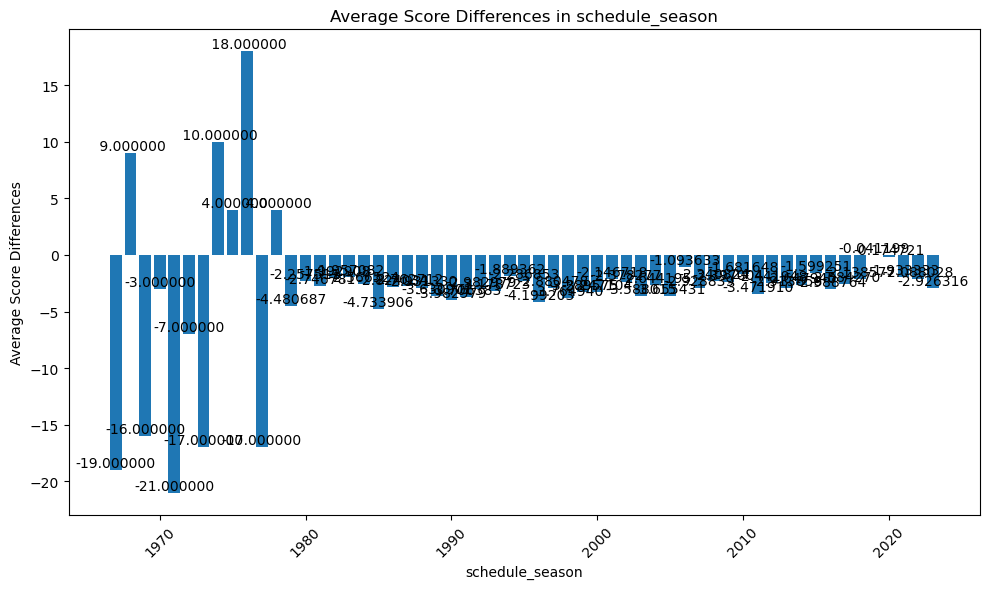

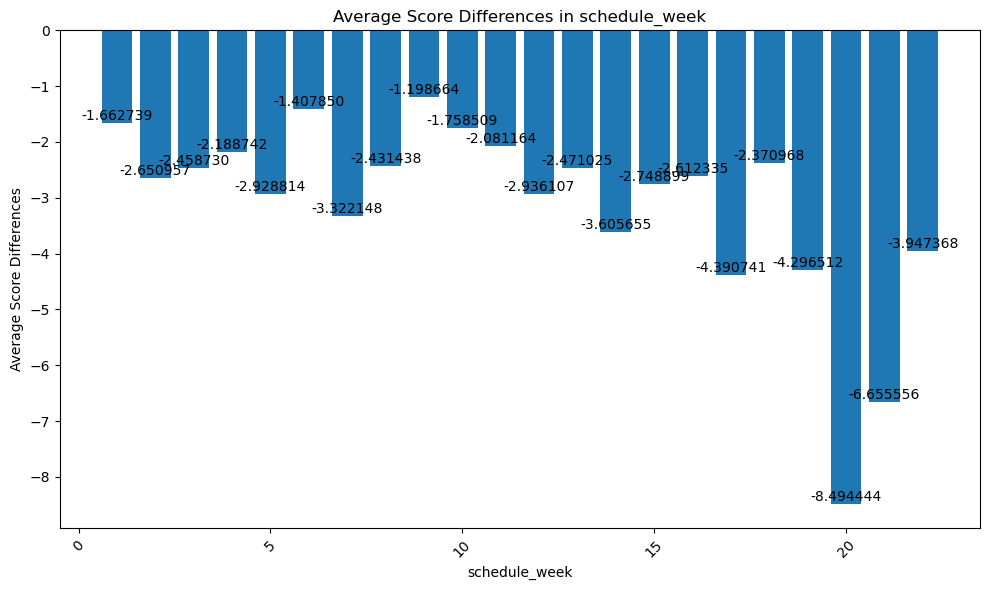

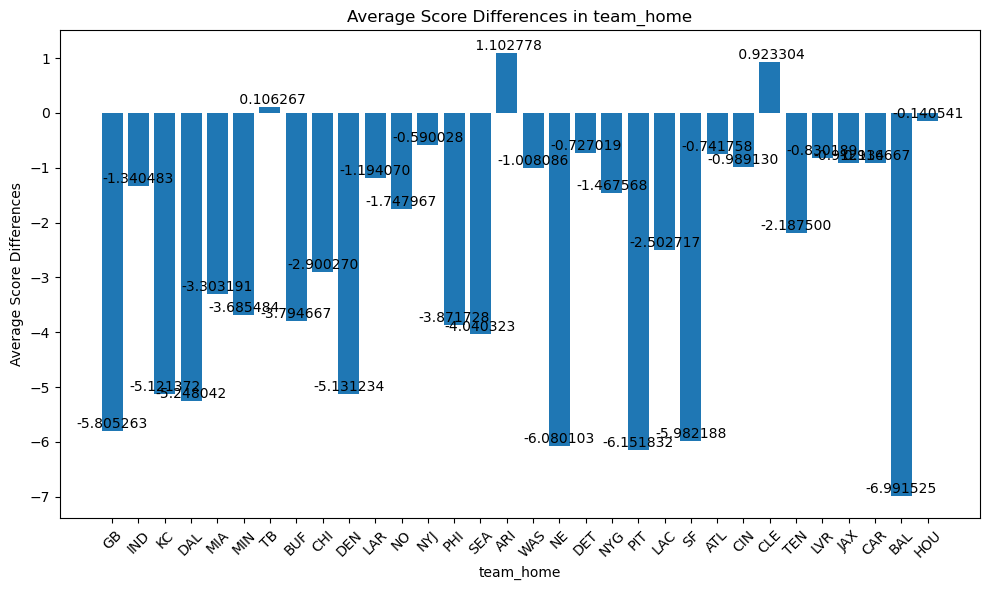

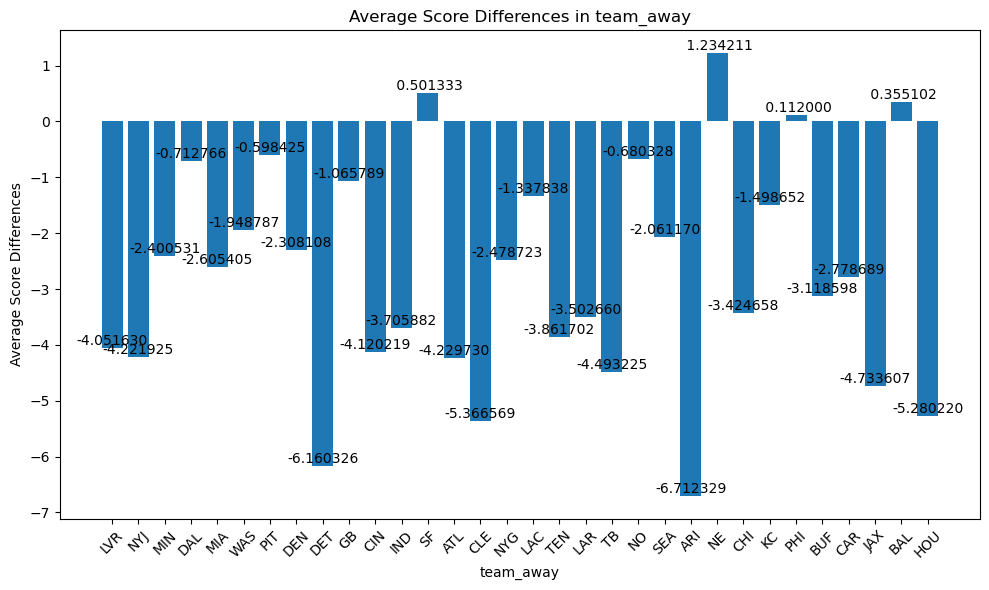

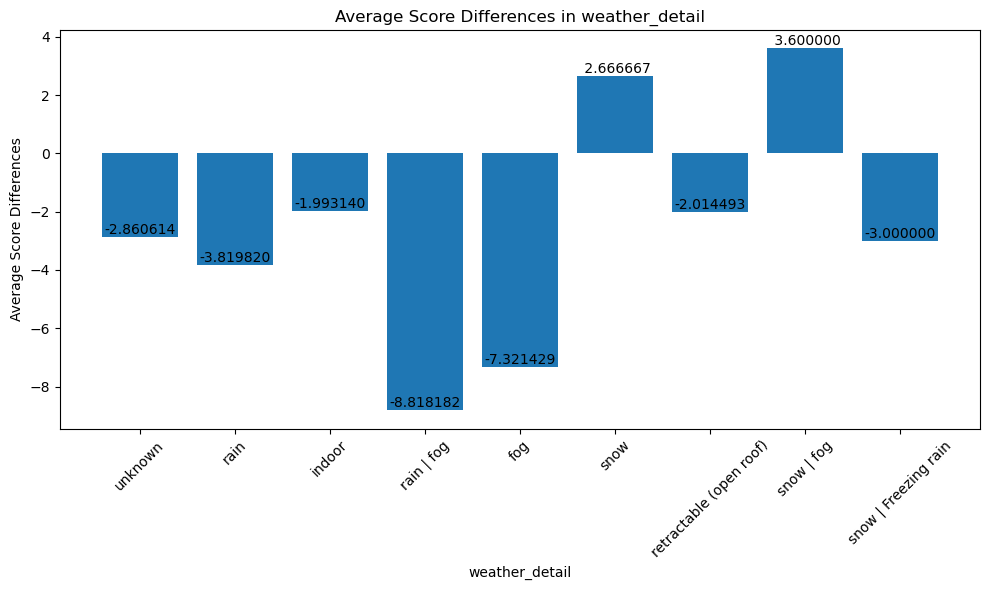

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
# Calculate the average score_difference for each unique value in a specific column
def plot_avg_score_difference(column_name):
    unique_values = games[column_name].unique()
    avg_score_diff = []
    
    for value in unique_values:
        avg_diff = games[games[column_name] == value]['score_difference'].mean()
        avg_score_diff.append(avg_diff)
        
    plt.figure(figsize=(10,6))
    bars = plt.bar(unique_values, avg_score_diff, align='center')
    plt.xlabel(column_name)
    plt.ylabel('Average Score Differences')
    plt.title(f'Average Score Differences in {column_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    for bar, label in zip(bars, avg_score_diff):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{label: 2f}', ha='center', va='bottom')
                 
    plt.show()
columns_of_interest = ['schedule_season', 'schedule_week', 'team_home', 'team_away', 'weather_detail']
for column in columns_of_interest:
    plot_avg_score_difference(column)

Since 1980, there seems to be an inherent rule that spreads should be in favor of the home team (negative)

GB, NE, PIT, and BAL seem to have the highest average point differential

SF, NE, PHIL, and BAL seem to be the only teams to, on average, win, even when away

Snow and fog seem to favor the away team (contrary to popular belief)

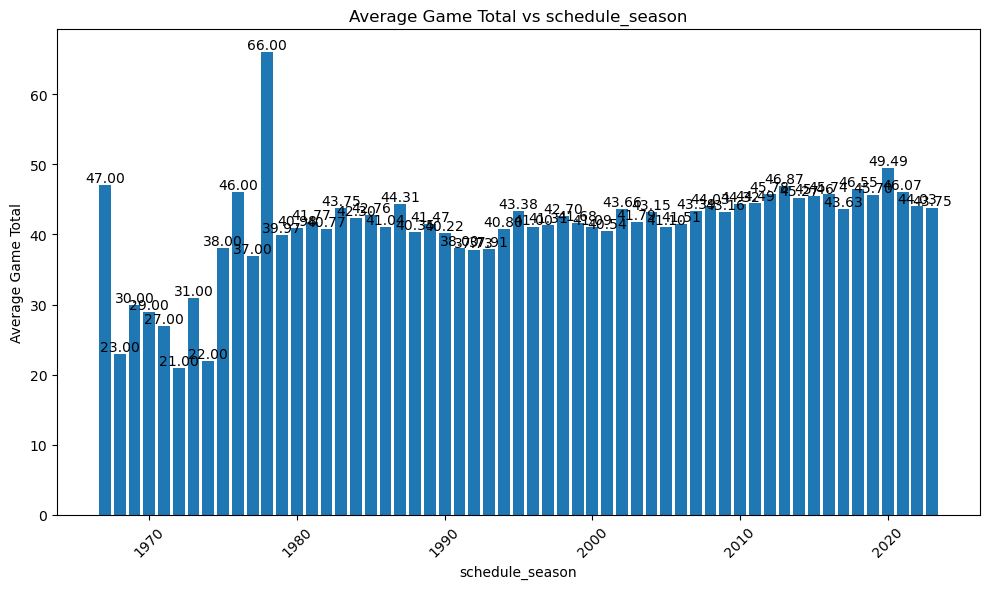

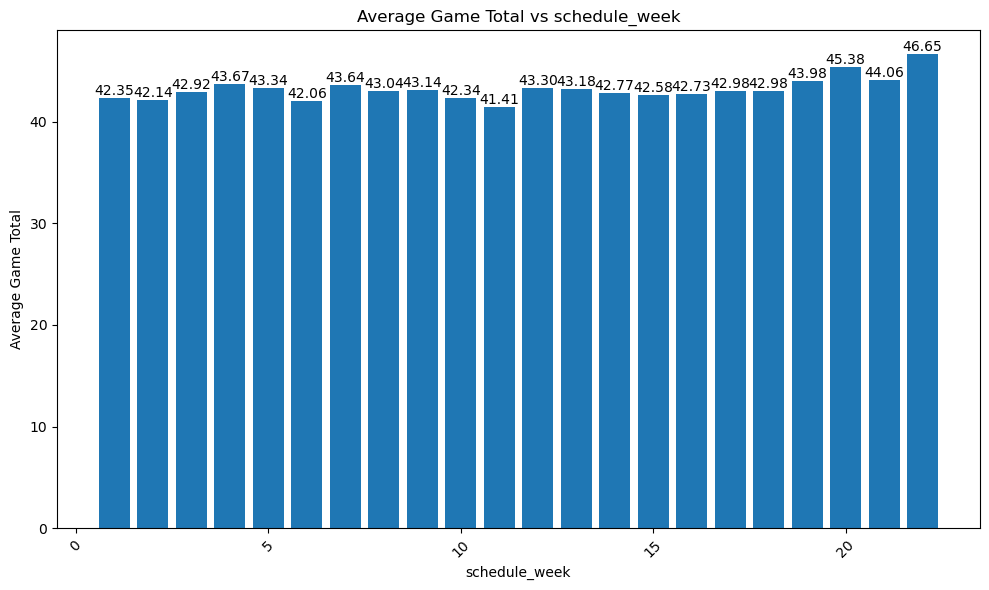

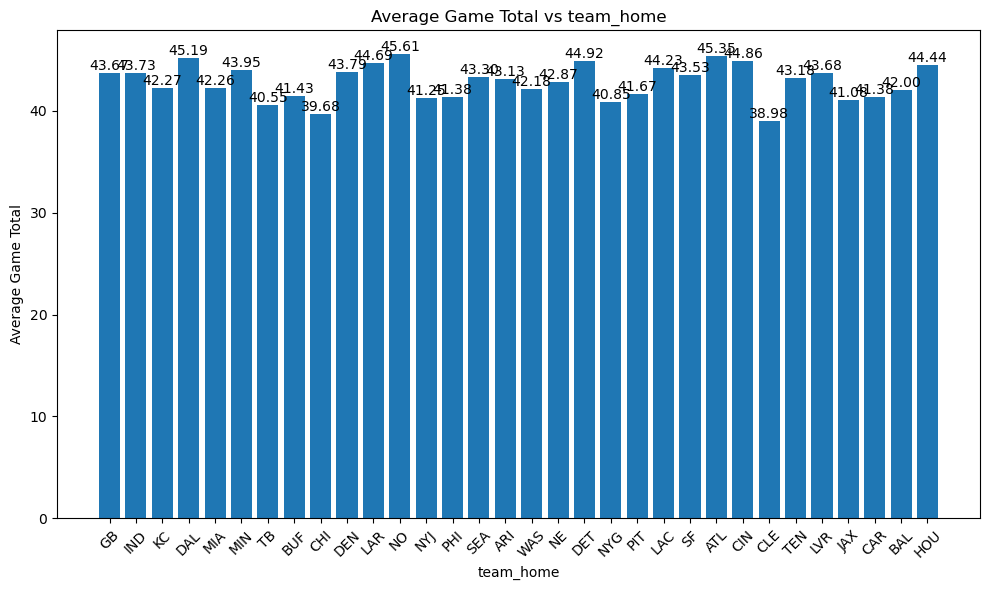

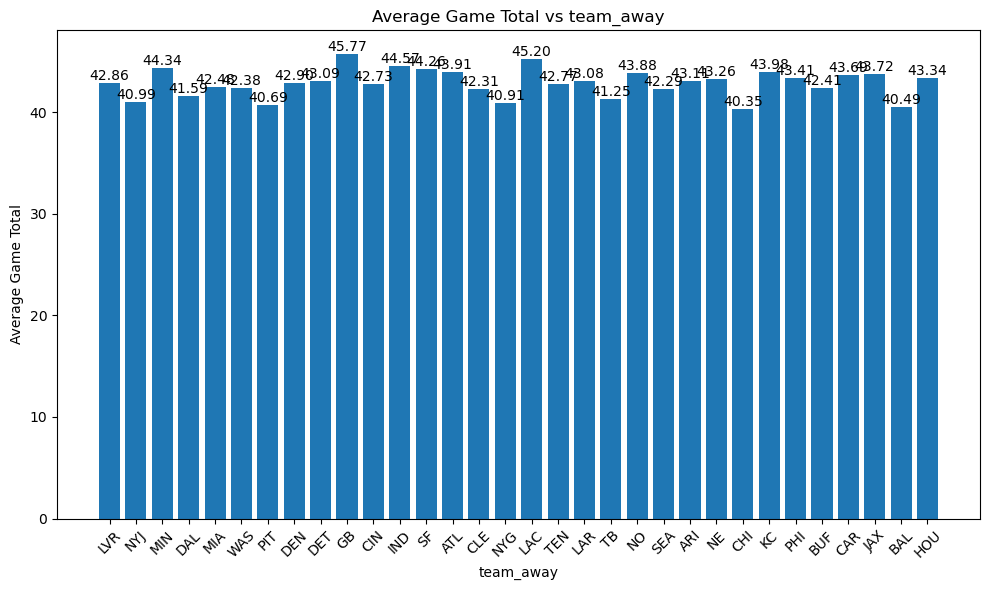

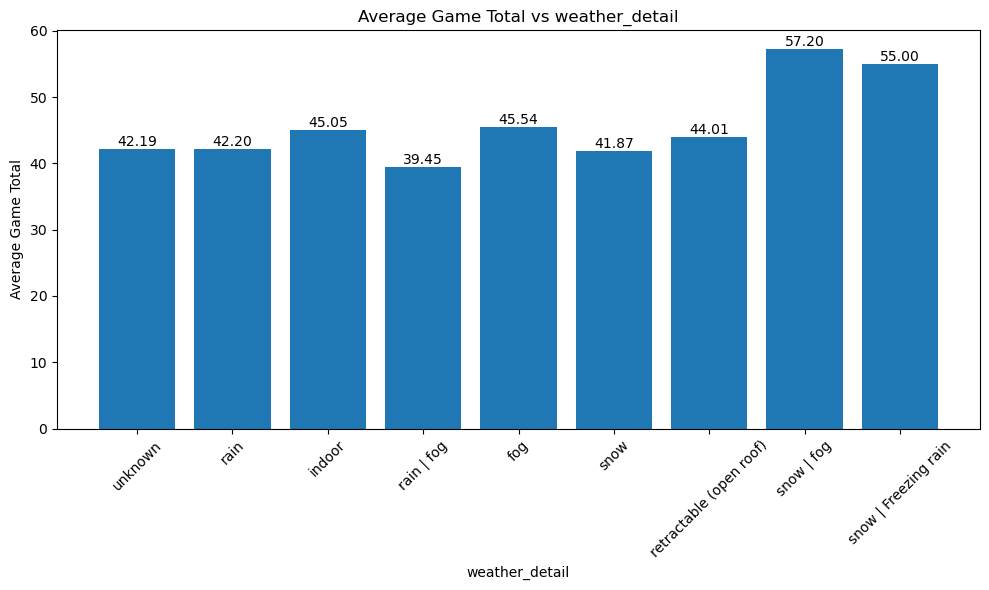

In [62]:
# do the same for point totals
def plot_avg_score_difference(column_name):
    unique_values = games[column_name].unique()
    avg_score_diff = []

    for value in unique_values:
        avg_diff = games[games[column_name] == value]['game_total'].mean()
        avg_score_diff.append(avg_diff)

    plt.figure(figsize=(10, 6))
    bars = plt.bar(unique_values, avg_score_diff, align='center')
    plt.xlabel(column_name)
    plt.ylabel('Average Game Total')
    plt.title(f'Average Game Total vs {column_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    for bar, label in zip(bars, avg_score_diff):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{label:.2f}', ha='center', va='bottom')

    plt.show()
columns_of_interest = ['schedule_season', 'schedule_week', 'team_home', 'team_away', 'weather_detail']

for column in columns_of_interest:
    plot_avg_score_difference(column)

Since 1980, there has been a slight and gradual increase in points per game

The Superbowl has the most points per game of any week of the year

GB has the highest Game Totals (good offense, bad defense?)

SHOCKINGLY: snow, fog, and freezing rain lead to MORE points per game

C:\Users\Matthew Scarpato\AppData\Local\Temp\ipykernel_15900\1823956332.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = games.corr()


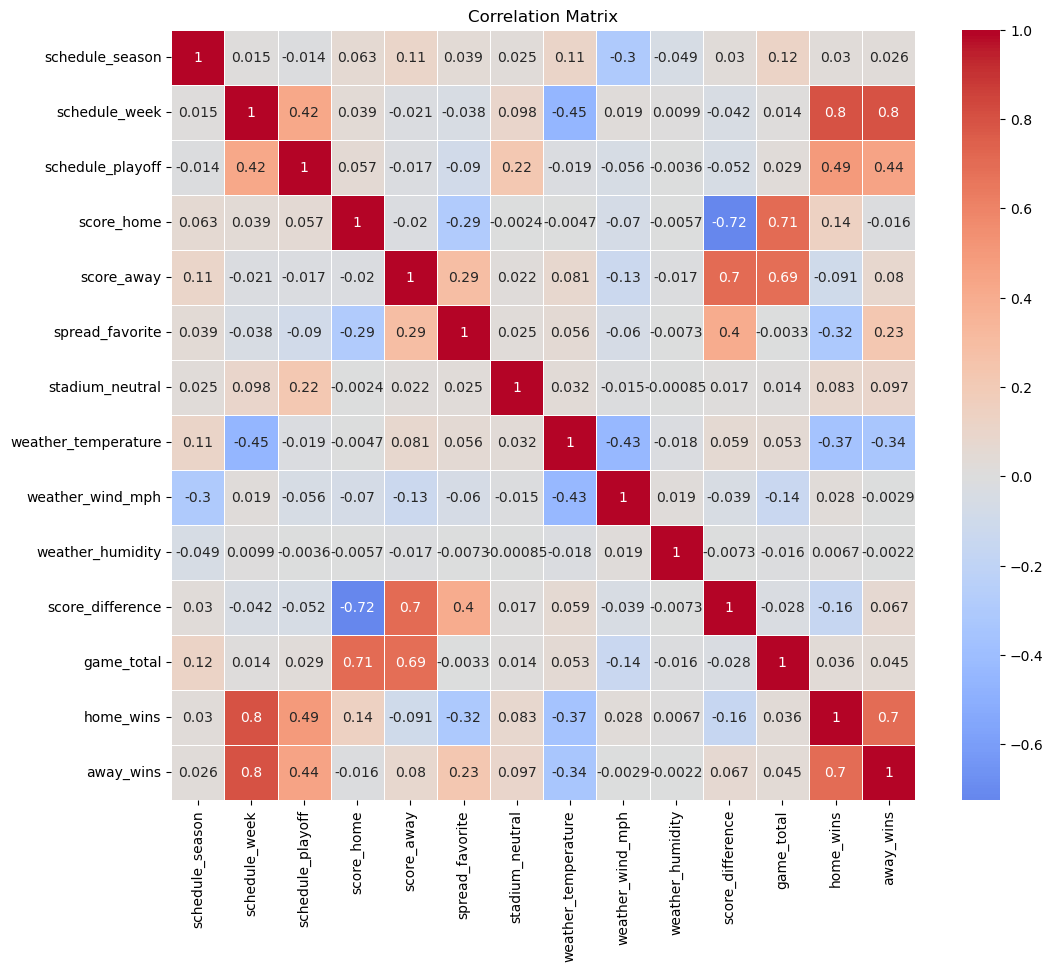

In [63]:
# Build a correlation matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = games.corr()
# Set up the figure size
plt.figure(figsize=(12, 10))
# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
# Set the title and show the plot
plt.title('Correlation Matrix')
plt.show()

Findings:

    Often times, seeing ONE team's score can give you a hint to the score difference or game total
    
    Temperature DOES play a role in score difference

### 3. Feature Selection

In [64]:
games.head(20)

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,...,weather_humidity,weather_detail,score_difference,game_total,winner,loser,day_of_week,month,home_wins,away_wins
0,1967,22,True,GB,33.0,14.0,LVR,GB,-13.5,43,...,74.000000,unknown,-19.0,47.0,GB,LVR,Sunday,January,0,0
1,1968,22,True,IND,7.0,16.0,NYJ,IND,-18.0,40,...,80.000000,rain,9.0,23.0,NYJ,IND,Sunday,January,0,0
2,1969,22,True,KC,23.0,7.0,MIN,MIN,12.0,39,...,84.000000,rain,-16.0,30.0,KC,MIN,Sunday,January,0,0
3,1970,22,True,IND,16.0,13.0,DAL,IND,-2.5,36,...,60.000000,unknown,-3.0,29.0,IND,DAL,Sunday,January,0,0
4,1971,22,True,DAL,24.0,3.0,MIA,IND,-6.0,34,...,40.000000,unknown,-21.0,27.0,DAL,MIA,Sunday,January,0,0
5,1972,22,True,MIA,14.0,7.0,WAS,MIA,-1.0,33,...,53.000000,unknown,-7.0,21.0,MIA,WAS,Sunday,January,0,0
6,1973,22,True,MIA,24.0,7.0,MIN,MIA,-6.5,33,...,81.000000,unknown,-17.0,31.0,MIA,MIN,Sunday,January,0,0
7,1974,22,True,MIN,6.0,16.0,PIT,PIT,3.0,33,...,72.000000,unknown,10.0,22.0,PIT,MIN,Sunday,January,0,0
8,1975,22,True,DAL,17.0,21.0,PIT,PIT,7.0,36,...,44.000000,unknown,4.0,38.0,PIT,DAL,Sunday,January,0,0
9,1976,22,True,MIN,14.0,32.0,LVR,LVR,4.0,38,...,59.000000,unknown,18.0,46.0,LVR,MIN,Sunday,January,0,0


We now need to clarify and hone in what we are analyzing, what the features/targets are, and how we expect these values will play out

In [65]:
column_names = games.columns.tolist()
print(column_names)

['schedule_season', 'schedule_week', 'schedule_playoff', 'team_home', 'score_home', 'score_away', 'team_away', 'team_favorite_id', 'spread_favorite', 'over_under_line', 'stadium', 'stadium_neutral', 'weather_temperature', 'weather_wind_mph', 'weather_humidity', 'weather_detail', 'score_difference', 'game_total', 'winner', 'loser', 'day_of_week', 'month', 'home_wins', 'away_wins']


In [66]:
columns_to_drop = ['score_home', 'score_away']
# Create a new DataFrame with specified columns dropped
gamesdf = games.drop(columns=columns_to_drop)
gamesdf.head()

,schedule_season,schedule_week,schedule_playoff,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,...,weather_humidity,weather_detail,score_difference,game_total,winner,loser,day_of_week,month,home_wins,away_wins
0,1967,22,True,GB,LVR,GB,-13.5,43,Orange Bowl,True,...,74.0,unknown,-19.0,47.0,GB,LVR,Sunday,January,0,0
1,1968,22,True,IND,NYJ,IND,-18.0,40,Orange Bowl,True,...,80.0,rain,9.0,23.0,NYJ,IND,Sunday,January,0,0
2,1969,22,True,KC,MIN,MIN,12.0,39,Tulane Stadium,True,...,84.0,rain,-16.0,30.0,KC,MIN,Sunday,January,0,0
3,1970,22,True,IND,DAL,IND,-2.5,36,Orange Bowl,True,...,60.0,unknown,-3.0,29.0,IND,DAL,Sunday,January,0,0
4,1971,22,True,DAL,MIA,IND,-6.0,34,Tulane Stadium,True,...,40.0,unknown,-21.0,27.0,DAL,MIA,Sunday,January,0,0


In [67]:
columns_to_move = ['score_difference', 'game_total', 'winner', 'loser']
# Reorganize the columns in the DataFrame
new_column_order = [col for col in gamesdf.columns if col not in columns_to_move] + columns_to_move
gamesdf = gamesdf[new_column_order]
# Now the specified columns are moved to the end of the DataFrame
gamesdf.head()

,schedule_season,schedule_week,schedule_playoff,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,...,weather_humidity,weather_detail,day_of_week,month,home_wins,away_wins,score_difference,game_total,winner,loser
0,1967,22,True,GB,LVR,GB,-13.5,43,Orange Bowl,True,...,74.0,unknown,Sunday,January,0,0,-19.0,47.0,GB,LVR
1,1968,22,True,IND,NYJ,IND,-18.0,40,Orange Bowl,True,...,80.0,rain,Sunday,January,0,0,9.0,23.0,NYJ,IND
2,1969,22,True,KC,MIN,MIN,12.0,39,Tulane Stadium,True,...,84.0,rain,Sunday,January,0,0,-16.0,30.0,KC,MIN
3,1970,22,True,IND,DAL,IND,-2.5,36,Orange Bowl,True,...,60.0,unknown,Sunday,January,0,0,-3.0,29.0,IND,DAL
4,1971,22,True,DAL,MIA,IND,-6.0,34,Tulane Stadium,True,...,40.0,unknown,Sunday,January,0,0,-21.0,27.0,DAL,MIA


In [68]:
# Now we need to normalize/standardize the numeric columns
from sklearn.preprocessing import StandardScaler
columns_to_exclude = ['score_difference', 'game_total', 'winner', 'loser']
numeric_columns = [col for col in gamesdf.columns if col not in columns_to_exclude and pd.api.types.is_numeric_dtype(gamesdf[col])]
# Create a copy of the DataFrame to avoid modifying the original
standardized_df = gamesdf.copy()
# Standardize the numeric columns
scaler = StandardScaler()
standardized_df[numeric_columns] = scaler.fit_transform(standardized_df[numeric_columns])
# Now your numeric columns are standardized, excluding the specified columns
standardized_df.head()

,schedule_season,schedule_week,schedule_playoff,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,...,weather_humidity,weather_detail,day_of_week,month,home_wins,away_wins,score_difference,game_total,winner,loser
0,-2.717150,2.322239,4.655034,GB,LVR,GB,-1.876579,43,Orange Bowl,9.911008,...,0.616902,unknown,Sunday,January,-1.199542,-1.245903,-19.0,47.0,GB,LVR
1,-2.639544,2.322239,4.655034,IND,NYJ,IND,-2.641140,40,Orange Bowl,9.911008,...,1.114088,rain,Sunday,January,-1.199542,-1.245903,9.0,23.0,NYJ,IND
2,-2.561939,2.322239,4.655034,KC,MIN,MIN,2.455933,39,Tulane Stadium,9.911008,...,1.445546,rain,Sunday,January,-1.199542,-1.245903,-16.0,30.0,KC,MIN
3,-2.484333,2.322239,4.655034,IND,DAL,IND,-0.007653,36,Orange Bowl,9.911008,...,-0.543199,unknown,Sunday,January,-1.199542,-1.245903,-3.0,29.0,IND,DAL
4,-2.406727,2.322239,4.655034,DAL,MIA,IND,-0.602311,34,Tulane Stadium,9.911008,...,-2.200486,unknown,Sunday,January,-1.199542,-1.245903,-21.0,27.0,DAL,MIA


Lets create a seperate dataframe for each of the targets (not loser, thats a repetitive goal as winner)

In [69]:
# List of categorical columns to one-hot encode
categorical_columns = ['team_home', 'team_away', 'team_favorite_id', 'stadium', 'stadium_neutral', 'weather_detail', 'day_of_week', 'month']
# Apply one-hot encoding to categorical columns
encoded_df = pd.get_dummies(standardized_df, columns=categorical_columns)
# Now the categorical columns have been one-hot encoded
print(encoded_df.head())  # Display the first few rows of the encoded DataFrame

   schedule_season  schedule_week  schedule_playoff  spread_favorite  \
0        -2.717150       2.322239          4.655034        -1.876579   
1        -2.639544       2.322239          4.655034        -2.641140   
2        -2.561939       2.322239          4.655034         2.455933   
3        -2.484333       2.322239          4.655034        -0.007653   
4        -2.406727       2.322239          4.655034        -0.602311   

  over_under_line  weather_temperature  weather_wind_mph  weather_humidity  \
0              43            -0.009197          0.853920          0.616902   
1              40             0.380331          0.853920          1.114088   
2              39            -0.333804          1.199723          1.445546   
3              36            -0.074118          0.681018         -0.543199   
4              34            -1.697152          1.891331         -2.200486   

   home_wins  away_wins  ...  day_of_week_Thursday  day_of_week_Tuesday  \
0  -1.199542  -1.245903

In [82]:
column_names = encoded_df.columns.tolist()
column_names

['schedule_season',
 'schedule_week',
 'schedule_playoff',
 'spread_favorite',
 'over_under_line',
 'weather_temperature',
 'weather_wind_mph',
 'weather_humidity',
 'home_wins',
 'away_wins',
 'score_difference',
 'game_total',
 'team_home_ARI',
 'team_home_ATL',
 'team_home_BAL',
 'team_home_BUF',
 'team_home_CAR',
 'team_home_CHI',
 'team_home_CIN',
 'team_home_CLE',
 'team_home_DAL',
 'team_home_DEN',
 'team_home_DET',
 'team_home_GB',
 'team_home_HOU',
 'team_home_IND',
 'team_home_JAX',
 'team_home_KC',
 'team_home_LAC',
 'team_home_LAR',
 'team_home_LVR',
 'team_home_MIA',
 'team_home_MIN',
 'team_home_NE',
 'team_home_NO',
 'team_home_NYG',
 'team_home_NYJ',
 'team_home_PHI',
 'team_home_PIT',
 'team_home_SEA',
 'team_home_SF',
 'team_home_TB',
 'team_home_TEN',
 'team_home_WAS',
 'team_away_ARI',
 'team_away_ATL',
 'team_away_BAL',
 'team_away_BUF',
 'team_away_CAR',
 'team_away_CHI',
 'team_away_CIN',
 'team_away_CLE',
 'team_away_DAL',
 'team_away_DEN',
 'team_away_DET',
 't

### 4. Linear Regression Model

In [83]:
# Select columns with string (object) data type
string_columns = encoded_df.select_dtypes(include=['object'])
# Print the string columns
print(string_columns)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[11312 rows x 0 columns]


In [91]:
encoded_df['over_under_line'] = pd.to_numeric(encoded_df['over_under_line'], errors='coerce')

In [85]:
# Remove the 'loser' and 'winner' column
encoded_df.drop(columns=['loser', 'winner'], inplace=True)

KeyError: "['loser', 'winner'] not found in axis"

In [92]:
# Replace NaN values with the mean of each column
encoded_df = encoded_df.fillna(encoded_df.mean())

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Separate features (X) and target variables (y)
X = encoded_df.drop(['score_difference', 'game_total'], axis=1)
y_score_diff = encoded_df['score_difference']
y_game_total = encoded_df['game_total']

# Split the data into training and testing sets
X_train, X_test, y_train_score_diff, y_test_score_diff, y_train_game_total, y_test_game_total = train_test_split(
    X, y_score_diff, y_game_total, test_size=0.2, random_state=42
)

# Create linear regression models for each target variable
model_score_diff = LinearRegression()
model_game_total = LinearRegression()

# Fit the models on the training data
model_score_diff.fit(X_train, y_train_score_diff)
model_game_total.fit(X_train, y_train_game_total)

# Make predictions on the test data
y_pred_score_diff = model_score_diff.predict(X_test)
y_pred_game_total = model_game_total.predict(X_test)

# Calculate mean squared error for each model
mse_score_diff = mean_squared_error(y_test_score_diff, y_pred_score_diff)
mse_game_total = mean_squared_error(y_test_game_total, y_pred_game_total)

print("Mean Squared Error for score_difference:", mse_score_diff)
print("Mean Squared Error for game_total:", mse_game_total)

Mean Squared Error for score_difference: 183.1740551255393
Mean Squared Error for game_total: 188.043490629253


These scores are EXTREMELY large, indicating these features aren't sufficient in reliably predicting game outcomes (through linear regression)

Lets try another method:

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Separate features (X) and target variables (y)
X = encoded_df.drop(['score_difference', 'game_total'], axis=1)
y_score_diff = encoded_df['score_difference']
y_game_total = encoded_df['game_total']

# Split the data into training and testing sets
X_train, X_test, y_train_score_diff, y_test_score_diff, y_train_game_total, y_test_game_total = train_test_split(
    X, y_score_diff, y_game_total, test_size=0.2, random_state=42
)

# Create Decision Tree regression models for each target variable
model_score_diff = DecisionTreeRegressor(random_state=42)
model_game_total = DecisionTreeRegressor(random_state=42)

# Fit the models on the training data
model_score_diff.fit(X_train, y_train_score_diff)
model_game_total.fit(X_train, y_train_game_total)

# Make predictions on the test data
y_pred_score_diff = model_score_diff.predict(X_test)
y_pred_game_total = model_game_total.predict(X_test)

# Calculate mean squared error for each model
mse_score_diff = mean_squared_error(y_test_score_diff, y_pred_score_diff)
mse_game_total = mean_squared_error(y_test_game_total, y_pred_game_total)

print("Mean Squared Error for score_difference:", mse_score_diff)
print("Mean Squared Error for game_total:", mse_game_total)

Mean Squared Error for score_difference: 367.6261599646487
Mean Squared Error for game_total: 373.8250110472824


Decision Trees have a tendency to overfit the data, lets try random forest

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Separate features (X) and target variables (y)
X = encoded_df.drop(['score_difference', 'game_total'], axis=1)
y_score_diff = encoded_df['score_difference']
y_game_total = encoded_df['game_total']

# Split the data into training and testing sets
X_train, X_test, y_train_score_diff, y_test_score_diff, y_train_game_total, y_test_game_total = train_test_split(
    X, y_score_diff, y_game_total, test_size=0.2, random_state=42
)

# Create Random Forest regression models for each target variable
model_score_diff = RandomForestRegressor(n_estimators=100, random_state=42)
model_game_total = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the models on the training data
model_score_diff.fit(X_train, y_train_score_diff)
model_game_total.fit(X_train, y_train_game_total)

# Make predictions on the test data
y_pred_score_diff = model_score_diff.predict(X_test)
y_pred_game_total = model_game_total.predict(X_test)

# Calculate mean squared error for each model
mse_score_diff = mean_squared_error(y_test_score_diff, y_pred_score_diff)
mse_game_total = mean_squared_error(y_test_game_total, y_pred_game_total)

print("Mean Squared Error for score_difference:", mse_score_diff)
print("Mean Squared Error for game_total:", mse_game_total)

Mean Squared Error for score_difference: 190.09055629695095
Mean Squared Error for game_total: 199.146035837384
